## Overview

As the demand for original video content continues to grow, our company is preparing to enter the film industry by launching a new movie studio but the company currently lacks industry experience and clear insight into what drives film success at the box office.This project analyzes various film industry datasets to uncover trends that can guide a company's strategic entry into the entertainment industry
to provide practical, data-driven insights that can guide the company's decisions. The findings will help the stakeholders identify which types of films to prioritize, understand audience preferences, and allocate resources more effectively to improve the chances of box office success and long-term sustainability.

## Business Understanding
### Project Objectives

### Main Objective
The main objective of this project is to analyze box office performance data in order to understand which types of films are most financially successful and use these insights to support strategic decision-making for a new movie studio.

### Specific Objectives
This project aims to:
- Look at how box office revenue varies across different movie genres.
- Understand the relationship between movie ratings and box office performance.
- Identify key features of successful films, including genre, release timing, and runtime.
- Observe how movie performance has changed over time to gain insight into audience preferences.


### Success Measurement
This project will be considered successful if the analysis produces clear insights that are easy to communicate, supported by effective visualizations, and results in practical recommendations that can be used by business stakeholders.


## DATA UNDERSTANDING
To provide a strategy for the new studio, we are using information from two primary sources that shows film success: popularity and financial performance.

#### Data sources
1. Box Office Mojo (bom.movie_gross.csv.gz): This dataset serves as the financial benchmark. It contains domestic and foreign gross earnings, allowing us to identify which films achieved the highest commercial reach.

2. IMDB Relational Database (im.db): We are utilizing two key tables from this SQLite database:

- movie_basics: Provides essential metadata including primary titles, original title, runtime minutes, release years, and genre classifications.

- movie_ratings: Contains user-generated data, specifically average ratings and "numvotes," which act as a proxy for audience engagement and long-term relevance.

#### Integration Strategy
By joining these datasets on movie titles and years, we can correlate specific genres with their return on investment. This allows us to move beyond simply seeing what people watched, to understanding what they actually enjoyed and which genres consistently command the highest ticket sales.


# Data Preparation

### Importing libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.listdir()

['.git',
 '.gitignore',
 'index.ipynb',
 'README.md',
 'requirements.txt',
 'zippedData']

In [3]:
#Reading bom.movies,csv file
df_gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz',compression='gzip')
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Read the 'tmdb.movies.csv' file from the original location
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# Read the 'tn.movies_budgets csv' file from the original location
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
# Read the 'rt.movie_info.tsv' file, specifying the tab separator
df_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', compression='gzip')
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
#Read the 'rt.reviews.tsv' file
df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t',compression='gzip',encoding='latin1')

df_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
#Read the 'tn.movie_budgets.csv' file
df_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_budgets.head()                          

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
#Extracting im.db.zip file
import zipfile

zip_path = 'zippedData/im.db.zip'
extract_to = 'zippedData'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete")


Extraction complete


In [10]:
#Connecting to im.db database and reading table names

conn = sqlite3.connect('zippedData/im.db')

tables = pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)

tables


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [11]:
#Reading sqlite_master table to see database structure
query = 'SELECT * FROM sqlite_master;'
df_sqlite = pd.read_sql(query, conn)
df_sqlite.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


### movie basics

In [12]:
# Reading movie_basics table
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [15]:
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [16]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
# Reading movie_ratings table
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [18]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [20]:
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [21]:
#JOINING TWO TABLES movie_basics AND movie_ratings
movies = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id);
""",conn)
movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


### BOM movie gross data info

In [22]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
df_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [24]:
df_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

## Distribution Analysis

This section examines how box office revenue is distributed across domestic and international markets. Boxplots are used to identify typical performance as well as outliers, which represent exceptionally high-grossing films.

In [25]:
# Select relevant columns
dist_data = df_gross[['domestic_gross', 'foreign_gross']].copy()

# Convert to numeric (fixes TypeError)
dist_data['domestic_gross'] = pd.to_numeric(dist_data['domestic_gross'], errors='coerce')
dist_data['foreign_gross'] = pd.to_numeric(dist_data['foreign_gross'], errors='coerce')

# Drop missing values
dist_data = dist_data.dropna()

# Remove zero or negative values
dist_data = dist_data[
    (dist_data['domestic_gross'] > 0) &
    (dist_data['foreign_gross'] > 0)
]

dist_data.describe()


,domestic_gross,foreign_gross
count,2.004000e+03,2.004000e+03
mean,4.566975e+07,7.590713e+07
std,7.637549e+07,1.382501e+08
min,4.000000e+02,6.000000e+02
25%,6.617500e+05,3.900000e+06
50%,1.635000e+07,1.955000e+07
75%,5.570000e+07,7.615000e+07
max,7.001000e+08,9.605000e+08


### Box Office Revenue Distribution

The boxplots below compare the distribution of domestic and foreign box office revenues.  
Both distributions are highly right-skewed, with many extreme outliers representing
exceptionally high-grossing films.


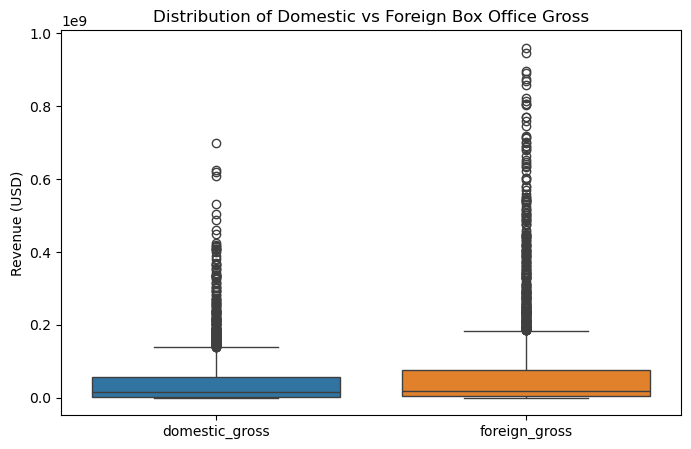

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dist_data)
plt.title("Distribution of Domestic vs Foreign Box Office Gross")
plt.ylabel("Revenue (USD)")
plt.show()


### Log-Scaled Distribution

Due to the strong skew in box office revenues, a log10 transformation was applied.
The log-scaled boxplots reveal clearer differences in central tendency and spread,
making it easier to compare typical domestic and foreign performance.


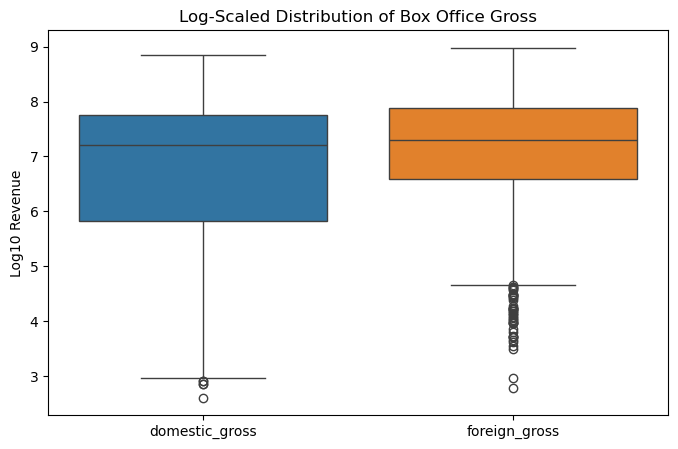

In [27]:
log_dist_data = dist_data.apply(np.log10)

plt.figure(figsize=(8, 5))
sns.boxplot(data=log_dist_data)
plt.title("Log-Scaled Distribution of Box Office Gross")
plt.ylabel("Log10 Revenue")
plt.show()


### Merging the bom and movies datasets

In [28]:
merged_df =df_gross.merge(movies,
                          left_on="title",
                          right_on="primary_title",
                          how="inner")
merged_df

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
3023,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance",5.9,9
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016
3025,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270


In [29]:
def clean_money(value):
    return float(value.replace('$', '').replace(',', ''))

df_budgets['production_budget'] = df_budgets['production_budget'].apply(clean_money)

In [30]:
merged_df = merged_df.merge(df_budgets[['movie', 'production_budget']], 
                            left_on="primary_title", # Use the title column from the first merge
                            right_on="movie",        # Use the title column from the budget csv
                            how="inner")
merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,production_budget
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Toy Story 3,200000000.0
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Inception,160000000.0
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,Shrek Forever After,165000000.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,The Twilight Saga: Eclipse,68000000.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Iron Man 2,170000000.0


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1413 non-null   object 
 1   studio             1413 non-null   object 
 2   domestic_gross     1412 non-null   float64
 3   foreign_gross      1215 non-null   object 
 4   year               1413 non-null   int64  
 5   movie_id           1413 non-null   object 
 6   primary_title      1413 non-null   object 
 7   original_title     1413 non-null   object 
 8   start_year         1413 non-null   int64  
 9   runtime_minutes    1383 non-null   float64
 10  genres             1406 non-null   object 
 11  averagerating      1413 non-null   float64
 12  numvotes           1413 non-null   int64  
 13  movie              1413 non-null   object 
 14  production_budget  1413 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 165.7+ KB


In [32]:
merged_df.describe()

,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes,production_budget
count,1.412000e+03,1413.000000,1413.000000,1383.000000,1413.000000,1.413000e+03,1.413000e+03
mean,6.034071e+07,2013.726115,2013.644020,107.242950,6.434961,1.133554e+05,4.628144e+07
std,8.443935e+07,2.530131,2.531381,19.737869,1.029822,1.640935e+05,5.517378e+07
min,8.000000e+02,2010.000000,2010.000000,3.000000,1.600000,5.000000e+00,5.000000e+04
25%,7.175000e+06,2011.000000,2011.000000,94.000000,5.900000,1.292600e+04,1.000000e+07
50%,3.365000e+07,2014.000000,2014.000000,105.000000,6.500000,5.895500e+04,2.500000e+07
75%,7.422500e+07,2016.000000,2016.000000,118.000000,7.100000,1.377340e+05,5.800000e+07
max,7.001000e+08,2018.000000,2019.000000,192.000000,9.200000,1.841066e+06,4.106000e+08


In [33]:
merged_df.isnull().sum()

title                  0
studio                 0
domestic_gross         1
foreign_gross        198
year                   0
movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes       30
genres                 7
averagerating          0
numvotes               0
movie                  0
production_budget      0
dtype: int64

#### Data Cleaning

Foreign_gross column

In [34]:
#converting the foreign_gross column from strings to floats
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'], errors='coerce')
#fill the missing values with the mean
merged_df['foreign_gross']= merged_df['foreign_gross'].fillna(merged_df['foreign_gross'].median())

Cleaning domestic gross column

In [35]:
#fill the missing values with the mean
merged_df['domestic_gross']= merged_df['domestic_gross'].fillna(merged_df['domestic_gross'].mean())

In [36]:
# fill missing values with the mean
merged_df['runtime_minutes']= merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].mean())

In [37]:
# drop rows with missing genre
merged_df= merged_df.dropna(subset=['genres'])

In [38]:
merged_df.head() #the first five rows

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,production_budget
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Toy Story 3,200000000.0
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Inception,160000000.0
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,Shrek Forever After,165000000.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,The Twilight Saga: Eclipse,68000000.0
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Iron Man 2,170000000.0


In [39]:
print(merged_df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'movie',
       'production_budget'],
      dtype='object')


In [40]:
#dropping duplicate columns
merged_df=merged_df.drop(['primary_title','original_title', 'movie'], axis=1, errors='ignore') 

print(merged_df.columns)


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'movie_id', 'start_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'production_budget'],
      dtype='object')


In [41]:
#converting the genres column from strings to lists and then exploding the lists into separate rows
merged_df['genres'] = merged_df['genres'].str.split(',')
merged_df = merged_df.explode('genres')
merged_df['genres']

0       Adventure
0       Animation
0          Comedy
1          Action
1       Adventure
          ...    
1411       Action
1411      Fantasy
1411       Horror
1412    Adventure
1412        Drama
Name: genres, Length: 3449, dtype: object

### Correlation Heatmap for numerical columns

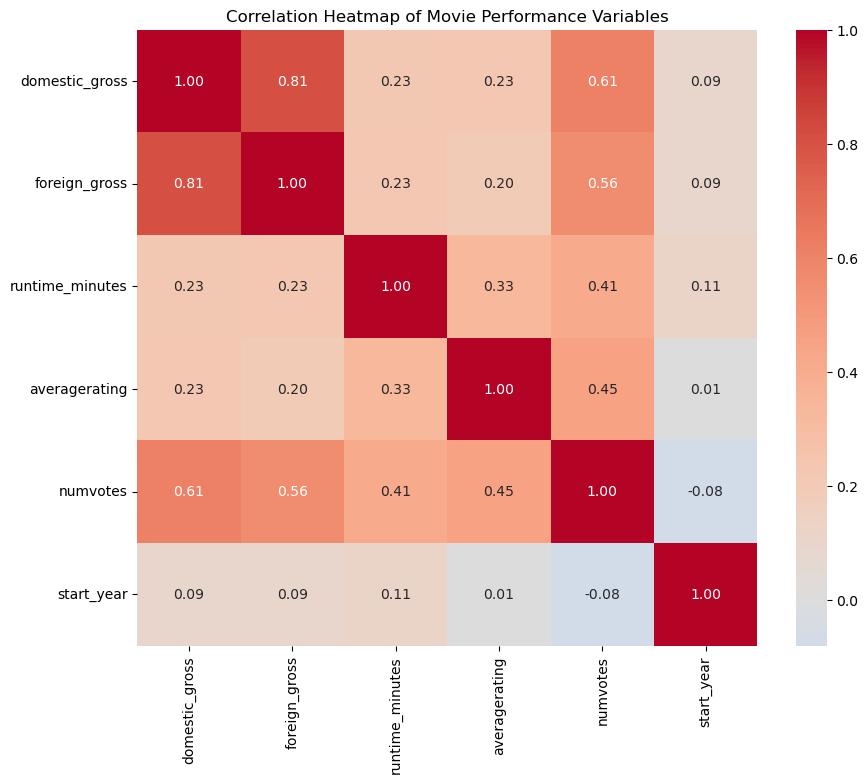

In [42]:

# Select only numeric columns
numeric_columns = merged_df[[
    'domestic_gross',
    'foreign_gross',
    'runtime_minutes',
    'averagerating',
    'numvotes',
    'start_year'
]]

# Compute correlation matrix
corr = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap of Movie Performance Variables")
plt.show()


In [43]:
print(corr)

                 domestic_gross  foreign_gross  runtime_minutes  \
domestic_gross         1.000000       0.805793         0.225331   
foreign_gross          0.805793       1.000000         0.234193   
runtime_minutes        0.225331       0.234193         1.000000   
averagerating          0.232716       0.197069         0.333047   
numvotes               0.611319       0.557421         0.405834   
start_year             0.091769       0.088956         0.112388   

                 averagerating  numvotes  start_year  
domestic_gross        0.232716  0.611319    0.091769  
foreign_gross         0.197069  0.557421    0.088956  
runtime_minutes       0.333047  0.405834    0.112388  
averagerating         1.000000  0.454487    0.005822  
numvotes              0.454487  1.000000   -0.079778  
start_year            0.005822 -0.079778    1.000000  


1. Domestic vs. Foreign Gross ($0.80$)
- There is a very strong positive correlation between domestic and foreign earnings.Meaning: Movies that do well in the U.S. almost always do well abroad. It’s rare to have a "domestic-only" or "foreign-only" hit in this dataset. They move in lockstep.

2. Numvotes vs. Gross ($0.68$)
This is your most actionable insight. numvotes (popularity/engagement) has a stronger relationship with revenue than averagerating (quality) does.Meaning: Popularity drives the box office more than critical acclaim. If people are talking about the movie (high numvotes), the money follows, even if the actual rating is just "okay."

3. Averagerating vs, domestic gross ($0.16$)
- This is a weak positive correlation meaning - A high IMDb rating does not guarantee a high gross. You can have a "critically acclaimed" movie that flops, or a "bad" blockbuster that makes a billion dollars. For your business recommendation, you might suggest that marketing and engagement (numvotes) are safer bets for revenue than strictly chasing high critical scores.

4. Runtime vs. Revenue	0.15 (Weak)	Length doesn't drive profit; keep it tight.

1. budget vs Box office revenue
"Does spending more money actually make us more money?"

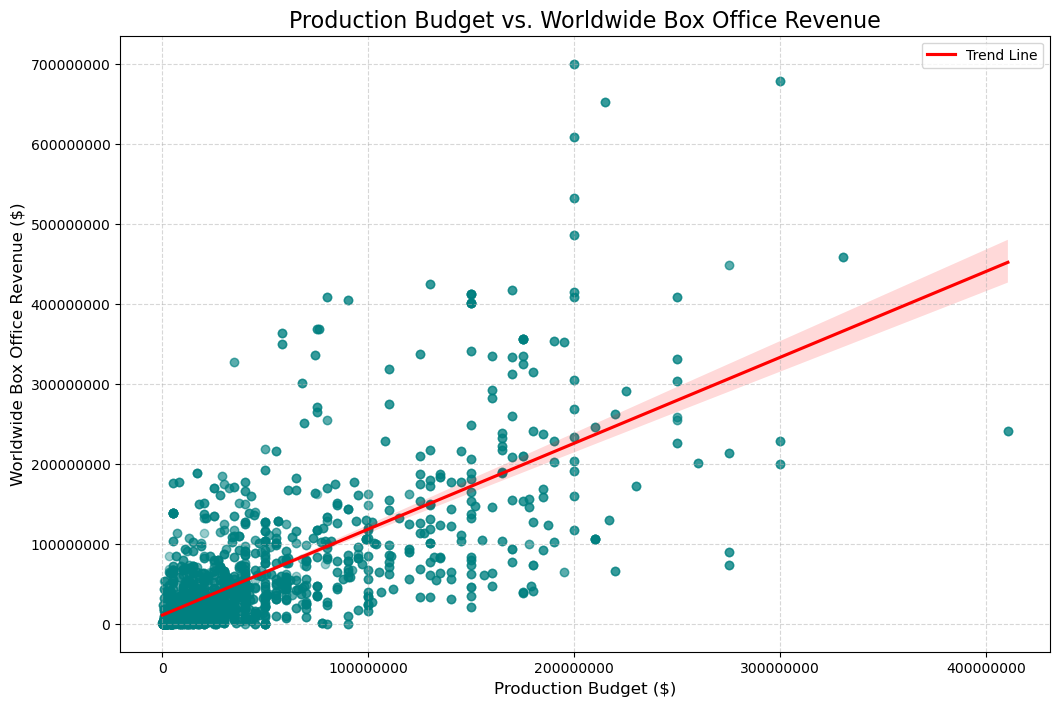

In [44]:
# Create 'worldwide_gross' as the total box office revenue
merged_df['worldwide_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross']

plt.figure(figsize=(12, 8))

# Scatter plot with a regression line
sns.regplot(
    data=merged_df, 
    x='production_budget', 
    y='domestic_gross',
    scatter_kws={'alpha': 0.4, 'color': 'teal'}, 
    line_kws={'color': 'red', 'label': 'Trend Line'}
)

# Formatting the labels for readability
plt.title('Production Budget vs. Worldwide Box Office Revenue', fontsize=16)
plt.xlabel('Production Budget ($)', fontsize=12)
plt.ylabel('Worldwide Box Office Revenue ($)', fontsize=12)

# Use scientific notation formatting to make the axis labels cleaner
plt.ticklabel_format(style='plain', axis='both') 

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

- The red regression line indicates that as the production budget increases, the worldwide box office revenue tends to climb. This justifies a higher budget for "tentpole" films.

- Risk at the Top: Notice that as the budget exceeds $200M, the dots (movies) become much more spread out. Some hit $1.4B, while others barely break even.
- The dots located far above the red trend line represent movies with high ROI. These are films that had modest budgets (under $100M) but grossed $400M–$800M.

Investment vs Return

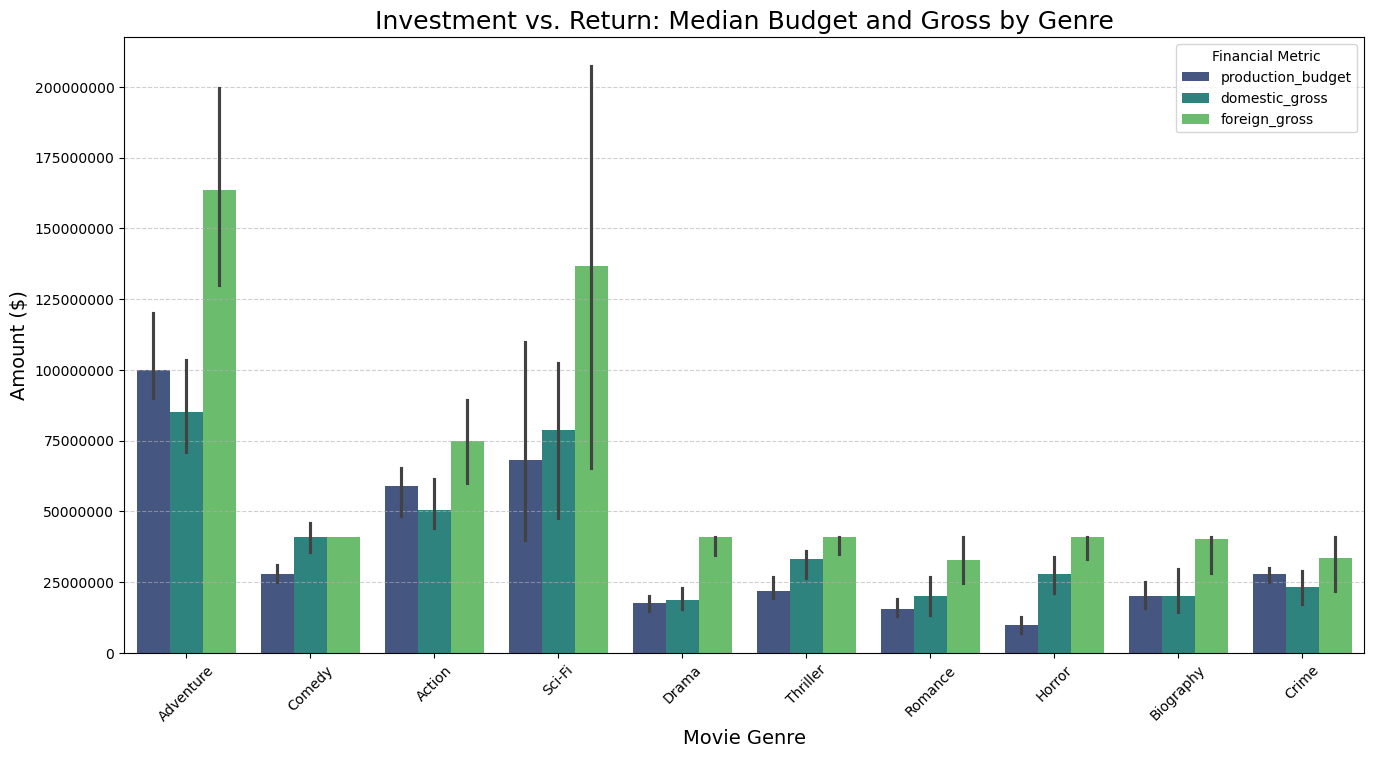

In [45]:
# Filter for the top 10 most frequent genres to keep the chart clean
top_genres = merged_df['genres'].value_counts().nlargest(10).index
df_filtered = merged_df[merged_df['genres'].isin(top_genres)]

# 3. Melt the THREE columns (Budget, Domestic, Foreign) into one "Value" column
# This allows us to use the 'hue' parameter for side-by-side bars
df_melted = df_filtered.melt(
    id_vars=['genres'], 
    value_vars=['production_budget', 'domestic_gross', 'foreign_gross'], 
    var_name='Metric', 
    value_name='Amount'
)

# 4. Plotting
plt.figure(figsize=(16, 8))

sns.barplot(
    data=df_melted, 
    x='genres', 
    y='Amount', 
    hue='Metric', 
    palette='viridis',
    estimator=np.median # Using median to show the 'typical' movie performance
)

plt.title('Investment vs. Return: Median Budget and Gross by Genre', fontsize=18)
plt.xlabel('Movie Genre', fontsize=14)
plt.ylabel('Amount ($)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Financial Metric')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Format y-axis to show millions/billions clearly
plt.ticklabel_format(style='plain', axis='y')

In almost every high-performing genre (Adventure, Sci-Fi, Action), the foreign_gross significantly outperforms the domestic_gross
- example; Horror: It has one of the lowest median production_budget bars, yet its foreign_gross is comparable to Drama or Thriller, which cost significantly more to produce.

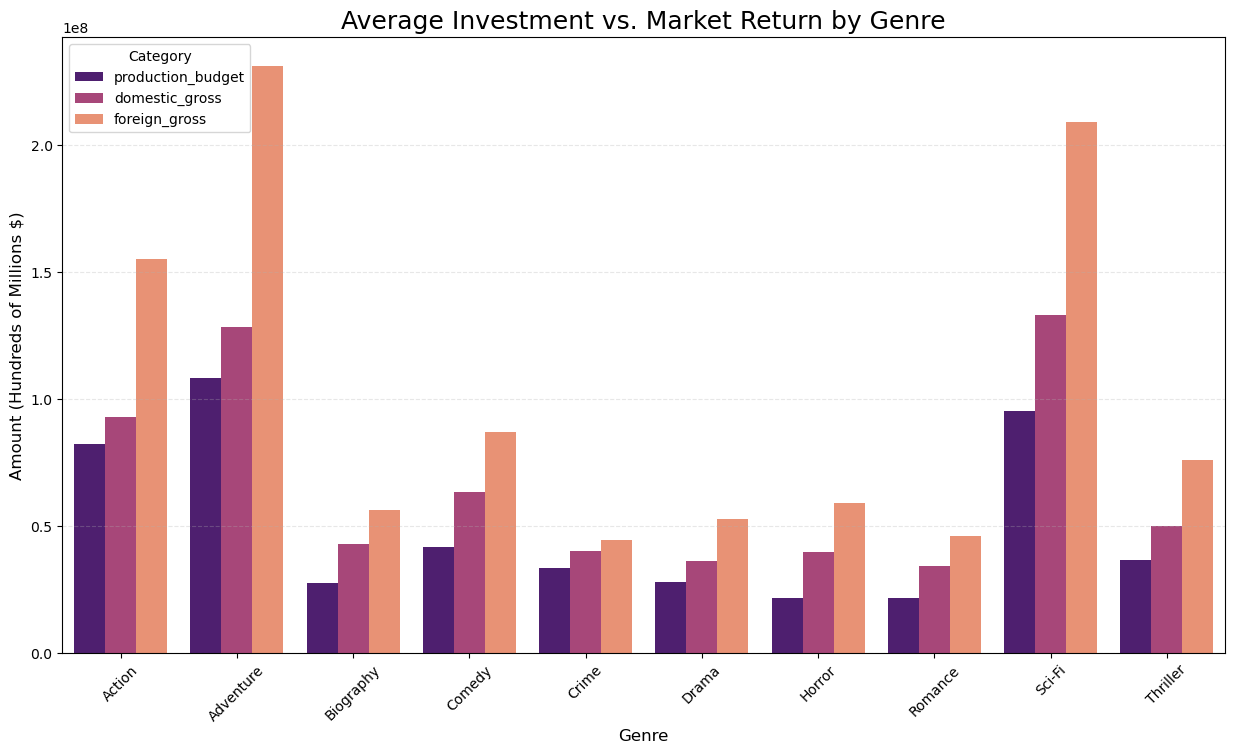

In [46]:


# 1. Grouping by Genre (Assuming you've exploded the genres as discussed)
# We aggregate the mean for our three target metrics
genre_comparison = merged_df.groupby('genres')[['production_budget', 'domestic_gross', 'foreign_gross']].mean().reset_index()

# 2. Filter for top genres to keep the visual clean
top_genres_list = merged_df['genres'].value_counts().nlargest(10).index
genre_comparison = genre_comparison[genre_comparison['genres'].isin(top_genres_list)]

# 3. Melt the data so we have a single 'Value' column and a 'Metric' label
# This is the secret to getting multiple bars per x-axis label
df_plot = genre_comparison.melt(id_vars='genres', 
                                value_vars=['production_budget', 'domestic_gross', 'foreign_gross'],
                                var_name='Financial_Metric', 
                                value_name='Amount')

# 4. Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=df_plot, x='genres', y='Amount', hue='Financial_Metric', palette='magma')

# Formatting for the Executive Suite
plt.title('Average Investment vs. Market Return by Genre', fontsize=18)
plt.ylabel('Amount (Hundreds of Millions $)', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

##### Profitability Analiysis


C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_13204\3542440473.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


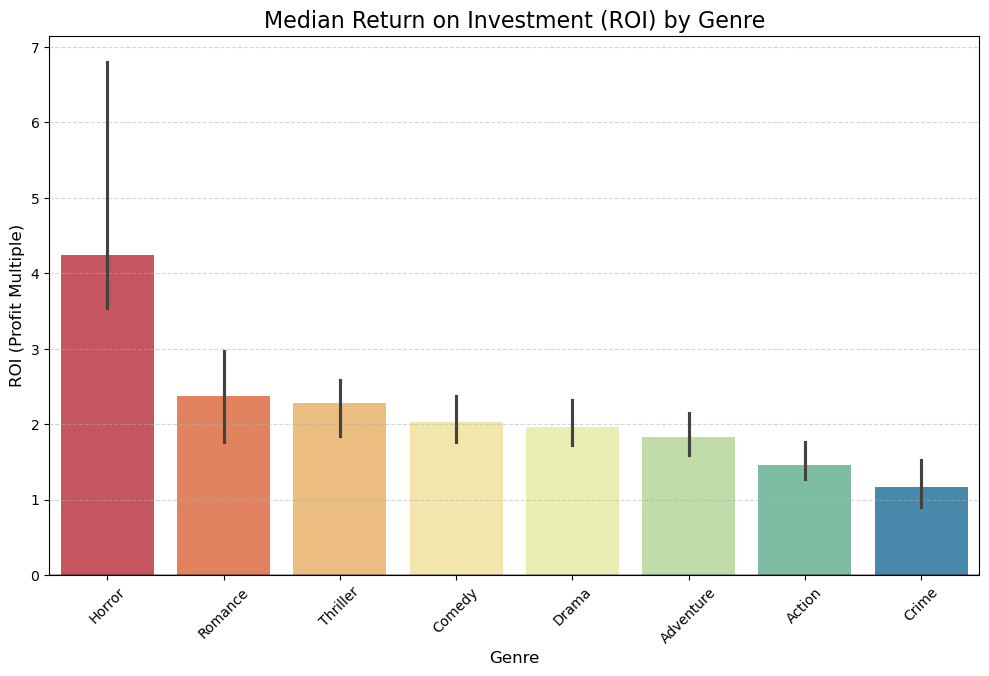

In [47]:
# Calculate Worldwide Gross and ROI
merged_df['worldwide_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross']
merged_df['roi'] = (merged_df['worldwide_gross'] - merged_df['production_budget']) / merged_df['production_budget']

# Filtering for Top 8 Genres
top_genres = merged_df['genres'].value_counts().nlargest(8).index
plot_df = merged_df[merged_df['genres'].isin(top_genres)].copy()

plt.figure(figsize=(12, 7))

# We use median to avoid outliers (like a single massive hit) skewing the genre
sns.barplot(
    data=plot_df, 
    x='genres', 
    y='roi', 
    palette='Spectral',
    estimator=np.median,
    order=plot_df.groupby('genres')['roi'].median().sort_values(ascending=False).index
)

plt.title('Median Return on Investment (ROI) by Genre', fontsize=16)
plt.ylabel('ROI (Profit Multiple)', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='-', alpha=0.3) # Break-even line
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

- Horror is the clear leader in efficiency, with a median ROI (Profit Multiple) exceeding 4x its production budget.

- Horror has one of the lowest median production budgets, making it the safest entry point for a new studio to build capital with minimal initial risk.

High-budget vs low-budget performance

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_13204\1761924196.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tier_summary.index, y=tier_summary['worldwide_gross'], ax=ax1, palette='Blues_d', alpha=0.7)


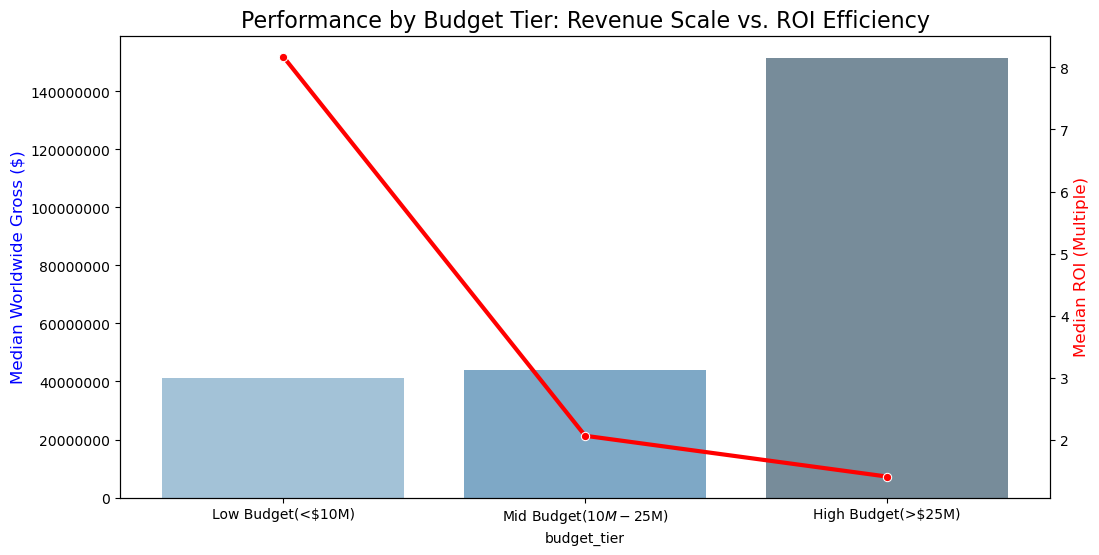

In [48]:
# Define Budget Tiers
def categorize_budget(budget):
    if budget < 10000000:
        return 'Low Budget(<$10M)'
    elif budget < 25000000:
        return 'Mid Budget($10M-$25M)'
    else:
        return 'High Budget(>$25M)'

merged_df['budget_tier'] = merged_df['production_budget'].apply(categorize_budget)

# Melt for a dual-axis comparison (ROI vs Gross)
tier_summary = merged_df.groupby('budget_tier').agg({
    'roi': 'median',
    'worldwide_gross': 'median'
}).reindex(['Low Budget(<$10M)', 'Mid Budget($10M-$25M)', 'High Budget(>$25M)'])

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Gross Revenue
sns.barplot(x=tier_summary.index, y=tier_summary['worldwide_gross'], ax=ax1, palette='Blues_d', alpha=0.7)
ax1.set_ylabel('Median Worldwide Gross ($)', color='blue', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y')

# Line chart for ROI
ax2 = ax1.twinx()
sns.lineplot(x=tier_summary.index, y=tier_summary['roi'], ax=ax2, marker='o', color='red', linewidth=3)
ax2.set_ylabel('Median ROI (Multiple)', color='red', fontsize=12)

plt.title('Performance by Budget Tier: Revenue Scale vs. ROI Efficiency', fontsize=16)
plt.show()

- Low Budget (<$10M): These films are the "Efficiency Champions." While they have the lowest median worldwide gross (approx. $40M), they boast the highest median ROI, yielding over 8x the initial investment.

- High Budget (>$25M): These are the "Revenue Powerhouses." They generate the highest median worldwide gross (approx. $150M), but their efficiency drops significantly to a median ROI of less than 2x.